# CHECKING VERSIONS OF LIBRARIES

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scipy: 1.11.4
numpy: 1.23.5
matplotlib: 3.7.1
pandas: 1.5.3
sklearn: 1.2.2


# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.inspection import permutation_importance
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, StratifiedKFold

from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# EXPLARATORY DATA ANALYSIS

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#engine_df = pd.read_csv('engine_data.csv')
engine_df = pd.read_csv('/content/drive/MyDrive/engine_data.csv')
#previewdataset
engine_df.head(10)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


In [5]:
# Check size and shape of datasets
engine_df.shape

(19535, 7)

In [6]:
# check data types of each feature
print('Data types of each feature:')
print(engine_df.dtypes)

Data types of each feature:
Engine rpm            int64
Lub oil pressure    float64
Fuel pressure       float64
Coolant pressure    float64
lub oil temp        float64
Coolant temp        float64
Engine Condition      int64
dtype: object


In [7]:
engine_df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [8]:
# Count the number of 0s and 1s
count = engine_df['Engine Condition'].value_counts()
print(count)


1    12317
0     7218
Name: Engine Condition, dtype: int64


**Important**


There is binary encoding to the target variable:
    

*   0: Bad Condition
*   1: Good Condition


    



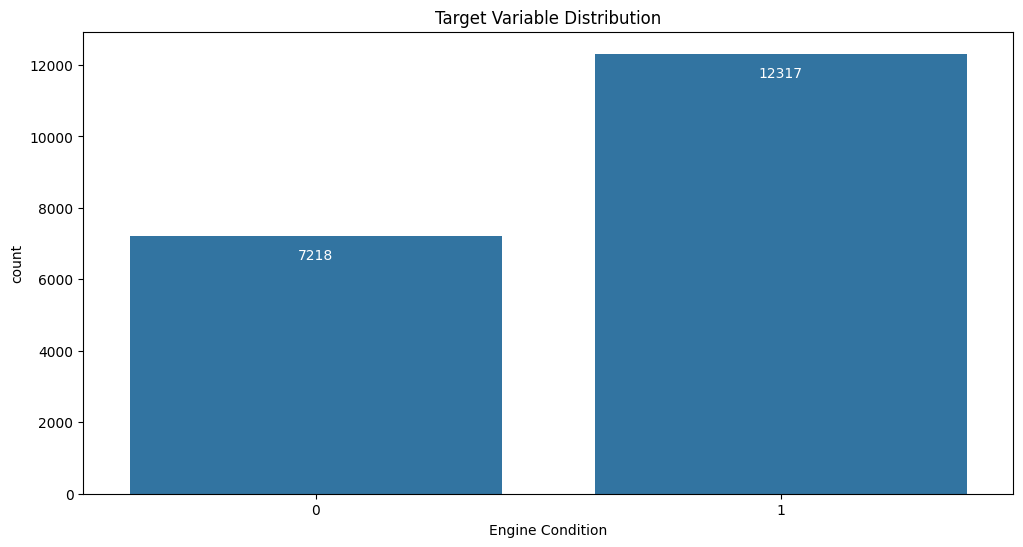

In [9]:
# A box plot showing target variable distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=engine_df, x='Engine Condition')
for p in ax.patches:
     ax.annotate(f'\n{int(p.get_height())}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.title('Target Variable Distribution')
plt.show()

# DATA PRE-PROCESSING

In [10]:
# count missing values per feature
missing_values = engine_df.isnull().sum()
print('Missing values per feature:')
print(missing_values)

Missing values per feature:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


In [11]:
#identify duplicated values
duplicates=engine_df.duplicated()
print(engine_df[duplicates])

Empty DataFrame
Columns: [Engine rpm, Lub oil pressure, Fuel pressure, Coolant pressure, lub oil temp, Coolant temp, Engine Condition]
Index: []


In [12]:
# check for any inconsistent values in categorical features
categorical_features = engine_df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    unique_values = engine_df[feature].unique()
    if len(unique_values) > 1:
        print(f'Inconsistent values found in {feature}:')
        print(unique_values)

# DATA VISUALIZATION

First, let's plot the Histogram for each sensor reading in order to better understand how their values are distributed:

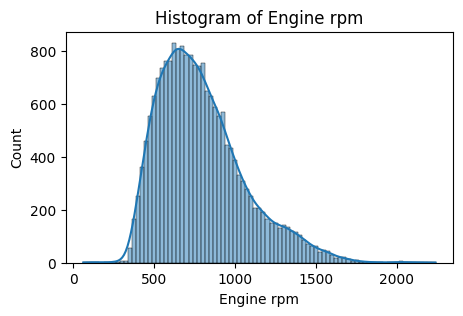

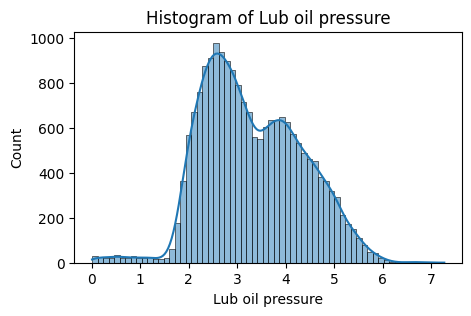

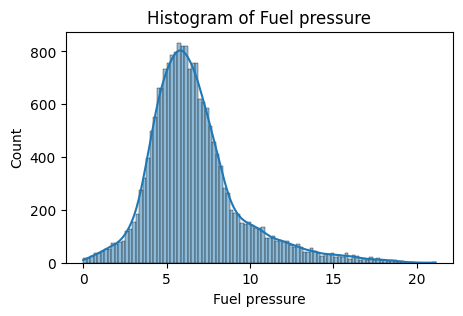

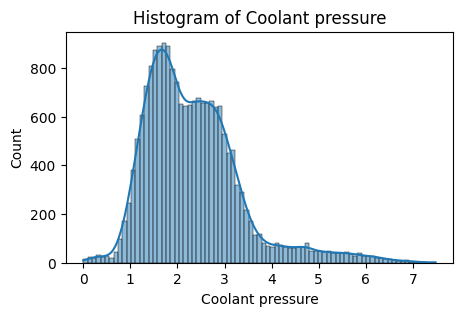

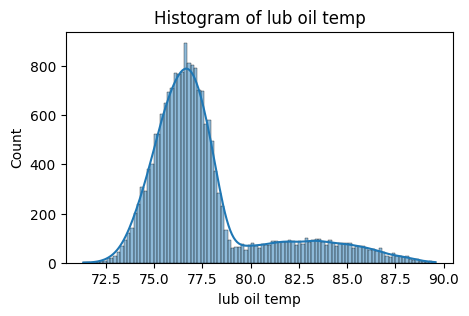

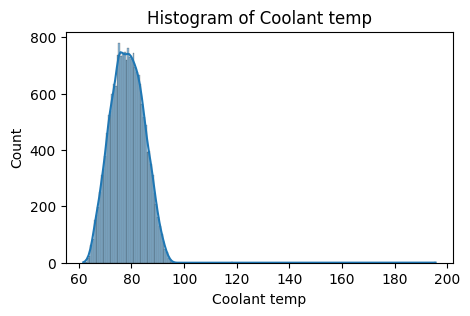

In [13]:
for column in engine_df.columns[:-1]:
    plt.figure(figsize=(5, 3))
    sns.histplot(engine_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()
    print('\n')

1. **Engine RPM:**
* The normal engine rpm ranges between 500 and 900
* The distribution of engine RPM is right-skewed with a peak around 500-1000 rpm.
*   There's a long tail with a few high rpm values, which could be instances when the engine is running at high speeds or outliers.
2. **Lubrication Oil Pressure:**
* The normal lubrication oil preassure is
*   This feature's data appears to have a bimodal distribution, suggesting there are two common states of oil pressure that the engine operates under.
*   There are also some high readings that deviate from the two peaks which could be outliers.
3. **Fuel Pressure:**
*   Fuel pressure shows a right-skewed distribution, with most data points clustered on the lower end and some potential outliers with very high fuel pressure readings.
4. **Coolant Pressure:**
*   The distribution is somewhat skewed to the right, with most of the data falling below 2.5 units of pressure.
*   Similar to coolant temperature, there's a long tail suggesting outliers or extreme values that may need further investigation.
5. **Lubrication Oil Temperature:**
*   The data for lubrication oil temperature is normally distributed with a peak around 75-80 degrees.
*   There are a few instances of higher temperatures, which might be outliers or cases of the engine running hot.
6. **Coolant Temperature:**
*   Most of the data is concentrated around a narrow range of temperatures, with a peak around 80-90 degrees, which is typical for engine coolant.
*   There is a long tail extending to the right, indicating some instances of very high coolant temperatures, which could be potential anomalies or outliers.

**Calculating the Correlation Coefficient**

In [15]:
corr_matrix = engine_df.drop('Engine Condition', axis=1).corr()

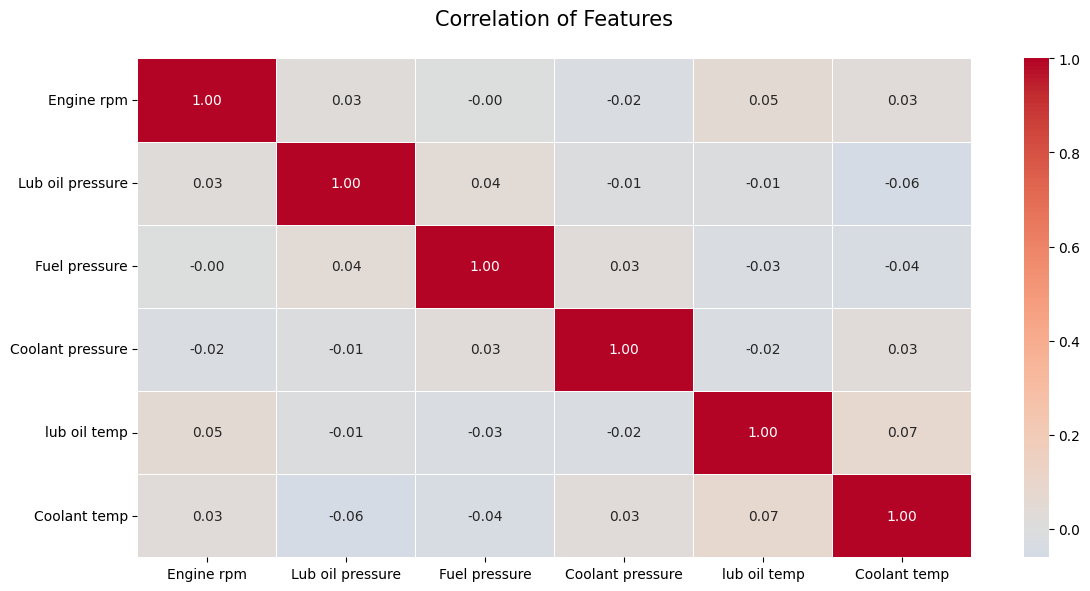

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))
plt.title('Correlation of Features', y=1.05, size=15)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.5)

# Adjust the plot
plt.tight_layout()

# Show the plot
plt.show()


This is a correlation matrix which is a very useful tool in identifying and understanding the relationships between different features in the data. The Pearson's correlation was used to calculate the correlation coefficients. The coefficient returns a value between -1 and 1, symbolizing the full spectrum of correlation: from a complete negative correlation to a total positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a strong correlation, and values below those values suggests a weak correlation, eliminating multicollinearity.

 Each cell in the matrix provides the correlation coefficient between two features. A value of 1 indicates a perfect positive correlation between two features (as seen in the diagonal from top left to bottom right where each feature is compared with itself). The other values range from -0.06 to 0.07 indicating very weak correlations between different pairs of these features. It appears that there are no strong correlations between the features, which suggests that they are largely independent of one another.

With this knowledge, it would be useful to examine scatter plots to check for any clusters or non-linear patterns that would point to a connection with the engine condition.

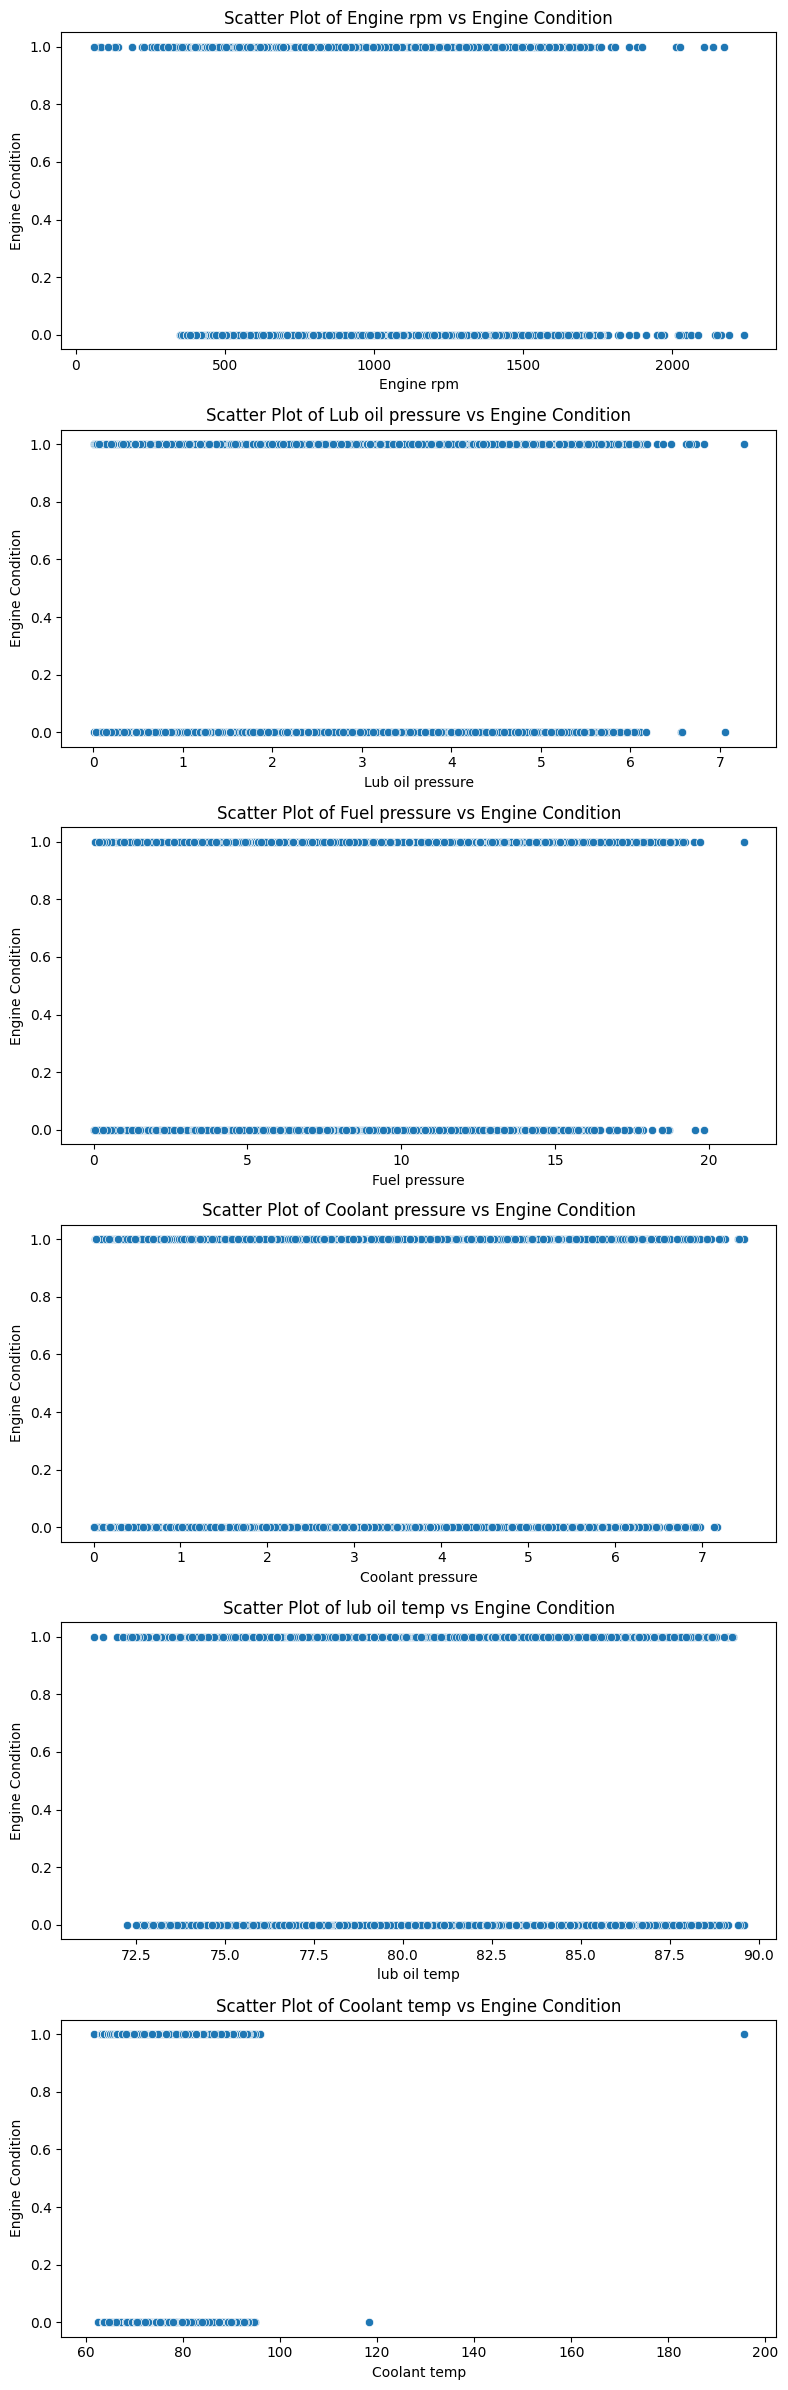

In [17]:
# Plot scatter plots for each feature against engine condition
num_sensors = len(engine_df.columns) - 1  # minus 1 to exclude the target variable
fig, axes = plt.subplots(nrows=num_sensors, ncols=1, figsize=(8, num_sensors*4))

# If only one feature is present, 'axes' will not be an array, so we wrap it into a list
if num_sensors == 1:
    axes = [axes]

for i, column in enumerate(engine_df.columns[:-1]):  # exclude the target variable
    sns.scatterplot(data=engine_df, x=column, y='Engine Condition', ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {column} vs Engine Condition')

plt.tight_layout()
plt.show()

1. **Engine rpm vs Engine Condition:**
*   There is a clustering of points at the lower end of the RPM scale associated with an engine condition of '1', which might suggest normal operation at lower speeds.
*  Some high RPM readings correspond to a '0' condition, which could indicate faults or issues occurring at higher RPMs.
2. **Lub Oil Pressure vs Engine Condition:**
*   The scatter plot does not show a clear pattern or trend. The data points are scattered, indicating that lubrication oil pressure alone may not be a strong predictor of engine condition.
3. **Fuel Pressure vs Engine Condition:**
*   Similar to lubrication oil pressure, fuel pressure also does not show a strong pattern with engine condition, suggesting it may not be a decisive predictor by itself.
4. **Coolant Pressure vs Engine Condition:**
*   The distribution is fairly even across the range of coolant pressure, with no apparent correlation with engine condition.
5. **Lub Oil Temp vs Engine Condition:**
*   This plot also does not show a clear distinction between different engine conditions based on lubrication oil temperature alone.
6. **Coolant Temp vs Engine Condition:**
*   There are a few high coolant temperature readings associated with an engine condition of '1'. This might be an indicator of overheating issues correlating with engine faults.

From these scatter plots, it's apparent that there isn't a strong linear relationship between any single feature and the engine condition. It suggests that the relationship is likely more complex and possibly non-linear, or that a combination of sensor readings would better predict the engine condition.

# FEATURE IMPORTANCE

In [18]:
# convert the DataFrame to a numpy array
data = engine_df.to_numpy()

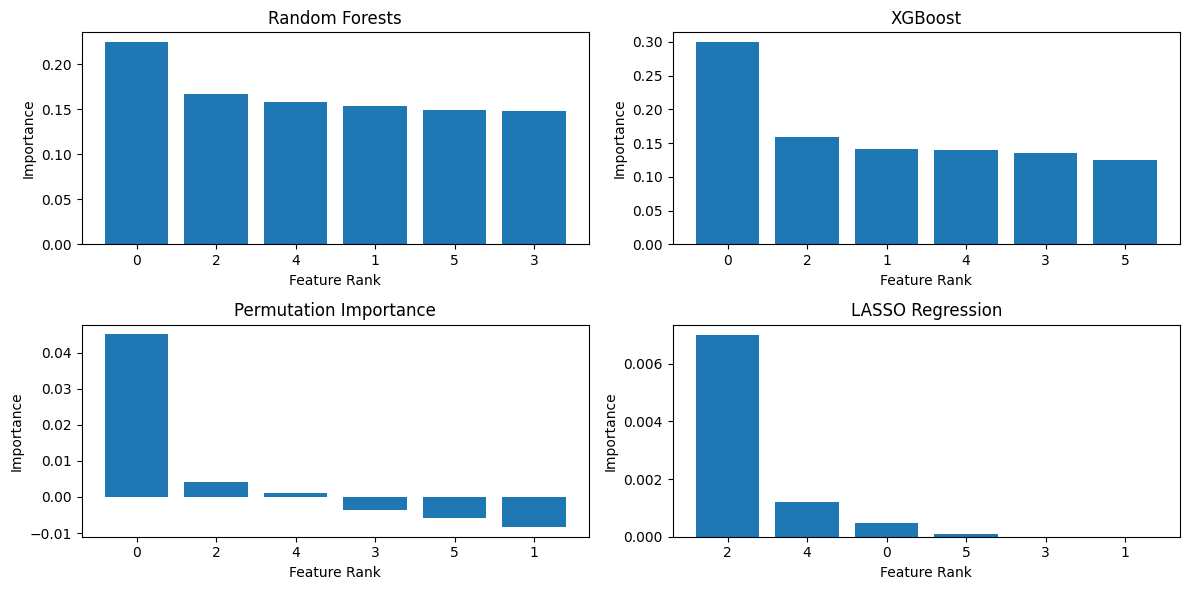

The best model based on accuracy is: XGBoost


In [19]:
# Separate target variable and features
engine_df = pd.DataFrame(data, columns=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp','Engine Condition'])
X = engine_df.drop('Engine Condition', axis=1)
y = engine_df['Engine Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Random Forests
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_feature_importance = rf_model.feature_importances_

# Method 2: XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_feature_importance = xgb_model.feature_importances_

# Method 3: Permutation Importance
perm_result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
perm_feature_importance = perm_result.importances_mean

# Method 4: LASSO Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_feature_importance = np.abs(lasso_model.coef_)

# Compare and visualize feature importance rankings
methods = ['Random Forests', 'XGBoost', 'Permutation Importance', 'LASSO Regression']
importances = [rf_feature_importance, xgb_feature_importance, perm_feature_importance, lasso_feature_importance]

plt.figure(figsize=(12, 6))
for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    if isinstance(importances[i], np.ndarray):
        indices = np.argsort(importances[i])[::-1]
        plt.bar(range(X_train.shape[1]), importances[i][indices], align='center')
        plt.xticks(range(X_train.shape[1]), indices)
        plt.xlabel('Feature Rank')
        plt.ylabel('Importance')
        plt.title(method)
    else:
        plt.bar(range(X_train.shape[1]), importances[i])
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(method)
    plt.tight_layout()

plt.show()

# Evaluate models and choose the best one based on accuracy
models = [rf_model, xgb_model, lasso_model]
accuracies = []

for model in models:
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict_proba(X_test)[:, 1]
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    accuracies.append(accuracy)

best_model_index = np.argmax(accuracies)
best_model = models[best_model_index]
print(f"The best model based on accuracy is: {methods[best_model_index]}")


In [20]:
# Separate target variable and features
engine_df = pd.DataFrame(data, columns=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp','Engine Condition'])
X = engine_df.drop('Engine Condition', axis=1)
y = engine_df['Engine Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best model based on accuracy (Random Forests)
best_model = xgb.XGBClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Get the feature importances and sort in descending order
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': best_model.feature_importances_})


# Get the indices sorted by most important to least important
indices = np.argsort(best_model.feature_importances_)[::-1]

# Get top 25 feature names and their scores
imp_features = []
for i in range(6):
    imp_features.append(X_train.columns[indices[i]])

imp_features= pd.DataFrame({'Feature': imp_features, 'Scores':best_model.feature_importances_[indices[range(6)]]})
imp_features= imp_features.sort_values('Scores', ascending=False).set_index('Feature')

imp_features


,Scores
Feature,
Engine rpm,0.299352
Fuel pressure,0.159731
Lub oil pressure,0.140712
lub oil temp,0.139861
Coolant pressure,0.134787
Coolant temp,0.125557


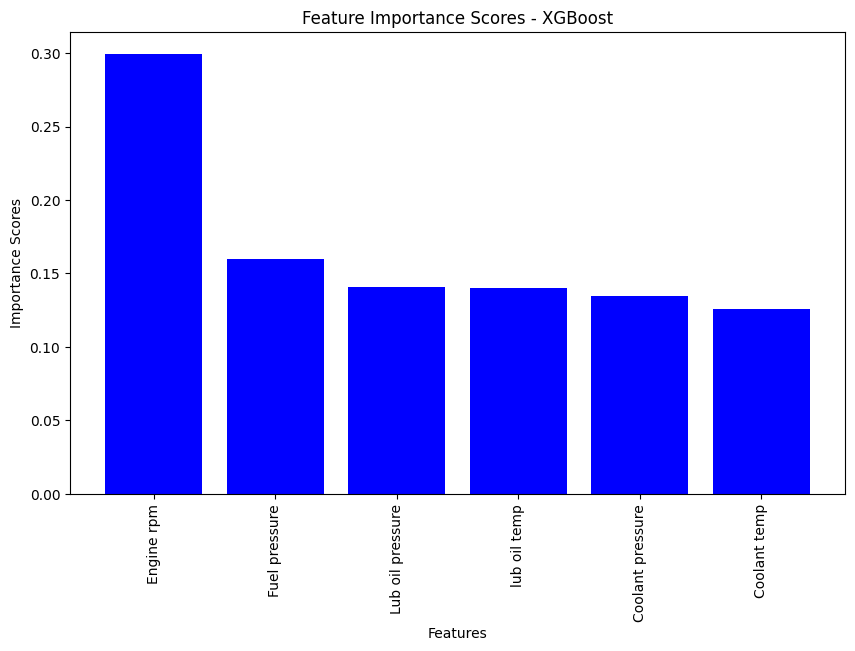

In [22]:
# Get the indices sorted by most important to least important
indices = np.argsort(best_model.feature_importances_)[::-1]

# Get top 25 feature names and their scores
imp_features = []
for i in range(6):
    imp_features.append(X_train.columns[indices[i]])

# Now plot
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.bar(imp_features, best_model.feature_importances_[indices[range(6)]], color='b', align='center')
plt.title('Feature Importance Scores - XGBoost')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.show()

# SCALING AND NORMALIZATION OF THE FEATURE

In [23]:
#engine_df = pd.read_csv('engine_data.csv')
engine_df = pd.read_csv('/content/drive/MyDrive/engine_data.csv')

In [24]:
# check for any outliers in numeric features
numeric_features = engine_df.select_dtypes(include=['int', 'float']).columns.tolist()
for feature in numeric_features:
    q1 = engine_df[feature].quantile(0.25)
    q3 = engine_df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = engine_df[(engine_df[feature] < lower_bound) | (engine_df[feature] > upper_bound)]
    if not outliers.empty:
        print(f'Outliers found in {feature}:')
        print(outliers)

    Out_sum=((engine_df < (q1 - 1.5 * iqr)) | (engine_df> (q3 + 1.5 * iqr))).sum()
print(f'\n Sum of Outliers in each column')
Out_sum

Outliers found in Engine rpm:
       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
55           1674          2.501620       3.624157          2.043075   
88           1776          3.648060       5.873874          1.318790   
102          1481          3.972600       5.701680          1.556111   
108          1661          3.518121      11.802902          2.951991   
143          1620          1.536989       6.398304          2.423895   
...           ...               ...            ...               ...   
19241        2136          3.311171       7.282090          1.678657   
19357        1556          4.786442       7.678463          4.029723   
19409        1586          5.044422       8.794704          2.523254   
19447        1807          3.727537      14.140429          4.446769   
19466        1579          2.745121       4.776110          1.730032   

       lub oil temp  Coolant temp  Engine Condition  
55        76.772327     74.641940                 0

Engine rpm          19535
Lub oil pressure    14819
Fuel pressure       18960
Coolant pressure     7368
lub oil temp        19535
Coolant temp        19535
Engine Condition        0
dtype: int64

In [25]:
from sklearn.preprocessing import RobustScaler
# Assuming 'engine_df' is our DataFrame and 'features' are our columns of interest
features = engine_df.columns[:-1]  # Exclude the target variable 'Engine Condition'

# create the scaler object
scaler = RobustScaler()

# fit and transform the data
robust_data = scaler.fit_transform(engine_df[features])

# Convert the array back to a DataFrame
robust_data = pd.DataFrame(robust_data, columns=features)

# Optionally, we can add the target variable back to the scaled DataFrame
robust_data['Engine Condition'] = engine_df['Engine Condition']

# print the original and robust scaled data
print("Original data:\n", engine_df)
print("\nRobust scaled data:\n", robust_data)






# Now 'robust_data' is a DataFrame with the scaled features

Original data:
        Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0             700          2.493592      11.790927          3.178981   
1             876          2.941606      16.193866          2.464504   
2             520          2.961746       6.553147          1.064347   
3             473          3.707835      19.510172          3.727455   
4             619          5.672919      15.738871          2.052251   
...           ...               ...            ...               ...   
19530         902          4.117296       4.981360          4.346564   
19531         694          4.817720      10.866701          6.186689   
19532         684          2.673344       4.927376          1.903572   
19533         696          3.094163       8.291816          1.221729   
19534         504          3.775246       3.962480          2.038647   

       lub oil temp  Coolant temp  Engine Condition  
0         84.144163     81.632187                 1  
1         7

As you can see each feature has been scaled based on the interquartile range, making the dataset less sensitive to outliers. The values are now on a similar scale, which is especially important for machine learning algorithms that are sensitive to the magnitude of input features.

The "Engine Condition" column remains unchanged as it is the target variable and should not be scaled.

In [26]:
# Features and target variable
X_data = robust_data.drop('Engine Condition', axis=1)  # All columns except the target
y_data = robust_data['Engine Condition']                # Target column
print(X_data.shape,y_data.shape)

(19535, 6) (19535,)


# HANDLING CLASS IMBALANCE

In [27]:
counts= robust_data['Engine Condition'].value_counts()

print("Good Condition: ", counts[1])
print("Bad Condition: ", counts[0])

Good Condition:  12317
Bad Condition:  7218


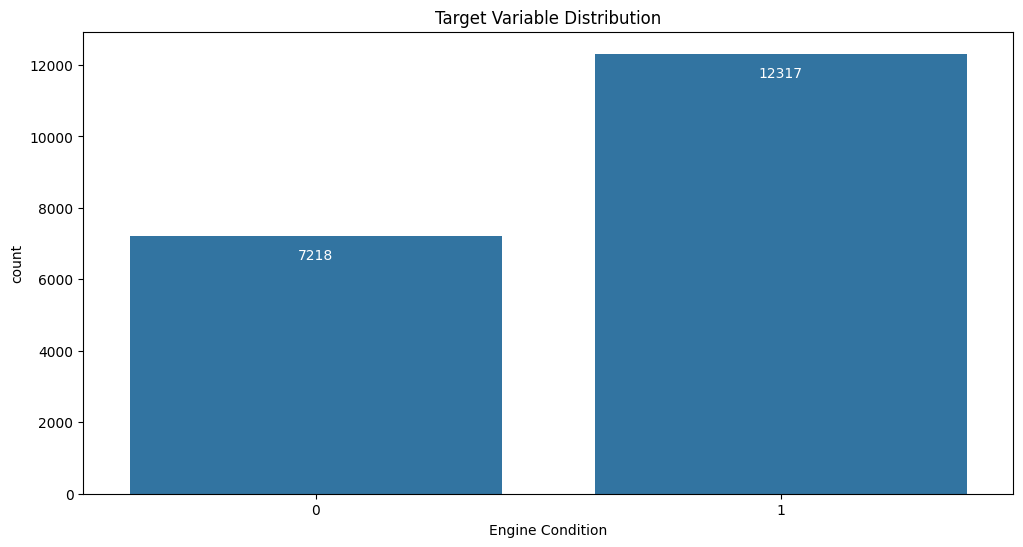

In [28]:
# A box plot showing target variable distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=robust_data, x='Engine Condition')
for p in ax.patches:
     ax.annotate(f'\n{int(p.get_height())}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.title('Target Variable Distribution')
plt.show()


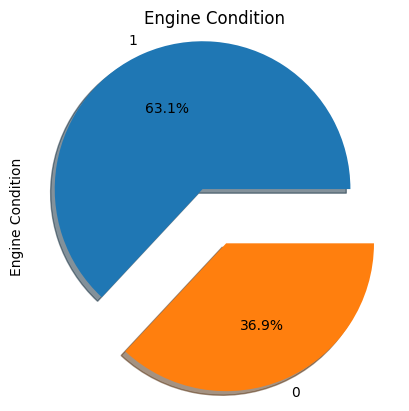

In [29]:
robust_data["Engine Condition"].value_counts().plot.pie(explode=[0.2,0.2],autopct='%1.1f%%',shadow=True)
plt.title('Engine Condition');

In [30]:
undersampler = RandomUnderSampler()
oversampler = RandomOverSampler()
smote = SMOTE()
samplers = [undersampler, oversampler, smote]

model = RandomForestClassifier()
def train_model_on_sampling_techniques(model, samplers, X_data, y_data):
    for sampler in samplers:
        X_train_res, y_train_res = sampler.fit_resample(X_data, y_data)
        pipeline = make_pipeline(StandardScaler(), model)
        scores = cross_val_score(pipeline, X_train_res, y_train_res, scoring='recall')
        print("The recall score for RFC using {0} is {1} (+/- {2})".format(str(sampler), round(scores.mean(), 3), round(scores.std(), 2)))

train_model_on_sampling_techniques(model, samplers, X_data, y_data)

The recall score for RFC using RandomUnderSampler() is 0.594 (+/- 0.02)
The recall score for RFC using RandomOverSampler() is 0.707 (+/- 0.01)
The recall score for RFC using SMOTE() is 0.658 (+/- 0.01)


In [31]:
#oversampling
rus = RandomOverSampler(sampling_strategy=1)
X_train_res,y_train_res = rus.fit_resample(X_data, y_data)
x = pd.DataFrame(X_train_res)
y = pd.DataFrame(y_train_res)

data = pd.concat([x,y], axis = 1)
data

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,-0.134897,-0.435055,1.976321,0.810733,3.123507,0.364249,1
1,0.381232,-0.143466,3.533182,0.238407,0.351104,0.454442,0
2,-0.662757,-0.130358,0.124263,-0.883178,0.398566,0.144026,1
3,-0.800587,0.355233,4.705814,1.250084,-1.145689,-0.728608,1
4,-0.372434,1.634204,3.372298,-0.091825,0.673419,0.959376,0
...,...,...,...,...,...,...,...
24629,0.255132,0.388426,0.028385,-0.405863,-0.109519,-0.821348,0
24630,-0.401760,0.619743,0.154479,-0.320294,0.638549,-0.036360,0
24631,1.434018,-0.516900,0.502589,-0.728042,0.202329,-0.020563,0
24632,-0.759531,0.051642,-1.723167,0.326581,-0.407959,-0.661716,0


In [32]:
counts= y_train_res.value_counts()

print("Good Condition: ", counts[1])
print("Bad Condition: ", counts[0])

Good Condition:  12317
Bad Condition:  12317


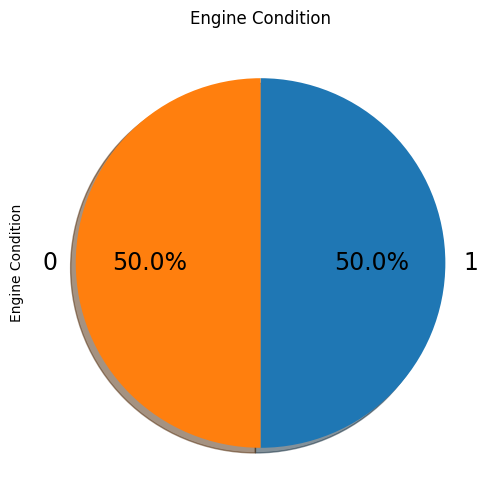

In [33]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)

y_train_res.value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17, shadow=True)
plt.title('Engine Condition');

In [34]:
print(X_train_res.shape,y_train_res.shape)

(24634, 6) (24634,)


# DATA SPLIT

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42, shuffle=True, stratify=y_train_res)

#Show the number of rows and columns in each set
print("Training X shape:",X_train.shape)
print("Training y shape:",y_train.shape)
print('\n')
print("Testing X shape:",X_test.shape)
print("Testing y shape:",y_test.shape)

Training X shape: (19707, 6)
Training y shape: (19707,)


Testing X shape: (4927, 6)
Testing y shape: (4927,)


# MODEL EVALUATION

In [36]:
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
}

# Evaluate each classifier
for name, clf in classifiers.items():
    print("Classifier:", name)

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", np.mean(cv_scores))

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate performance on test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Test set accuracy:", accuracy)
    print("Test set precision:", precision)
    print("Test set recall:", recall)
    print("Test set F1-score:", f1)
    print("\n")

Classifier: Random Forest
Cross-validation scores: [0.73795028 0.7435312  0.74219741 0.73686882 0.73991373]
Mean CV accuracy: 0.740092287161559
Test set accuracy: 0.767607063121575
Test set precision: 0.8006386861313869
Test set recall: 0.7125456760048721
Test set F1-score: 0.7540279269602578


Classifier: Gaussian Naive Bayes
Cross-validation scores: [0.62328767 0.6194825  0.63181934 0.61507232 0.62852068]
Mean CV accuracy: 0.623636499864632
Test set accuracy: 0.6127460929571747
Test set precision: 0.5964546402502607
Test set recall: 0.6967113276492083
Test set F1-score: 0.6426966292134831


Classifier: Logistic Regression
Cross-validation scores: [0.64687976 0.63571791 0.65034255 0.6346105  0.64374524]
Mean CV accuracy: 0.6422591932166375
Test set accuracy: 0.6324335295311548
Test set precision: 0.6206513693560326
Test set recall: 0.6808769792935444
Test set F1-score: 0.6493707647628267


Classifier: Gradient Boosting Classifier
Cross-validation scores: [0.66032471 0.64738711 0.65617

# APPLYING MACHINE LEARNING MODELS

Random Forest Classifier

ACCURACY OF THE MODEL:  76.90278059671199 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.74      0.82      0.78      2464
           1       0.80      0.72      0.76      2463

    accuracy                           0.77      4927
   macro avg       0.77      0.77      0.77      4927
weighted avg       0.77      0.77      0.77      4927



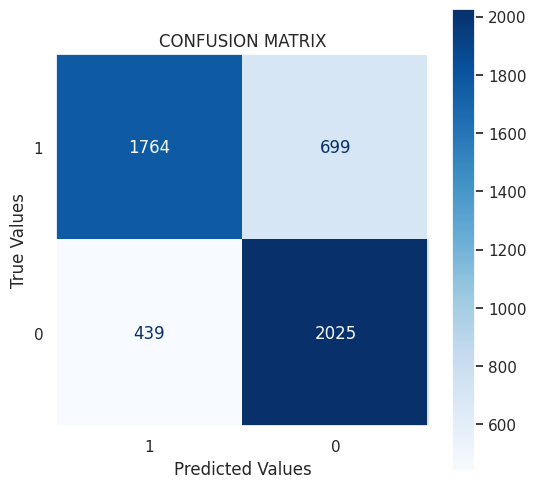

In [37]:
# creating a RF classifier
rfc = RandomForestClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train,y_train)

# performing predictions on the test dataset
rfc_pred = rfc.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, rfc_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, rfc_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,rfc_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 87.34796085968438 % 



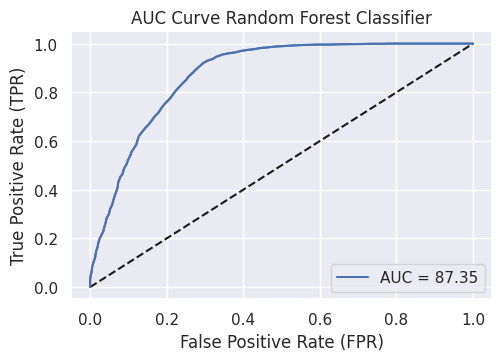

In [38]:
plt.figure(figsize=(25,16))
Y_predict1_proba = rfc.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)*100
print('ROC_AUC value :',roc_auc,"%",'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve Random Forest Classifier')
plt.grid(True)
plt.show()


Gaussian Naive Bayes (GNB)

ACCURACY OF THE MODEL:  61.274609295717475 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.64      0.53      0.58      2464
           1       0.60      0.70      0.64      2463

    accuracy                           0.61      4927
   macro avg       0.62      0.61      0.61      4927
weighted avg       0.62      0.61      0.61      4927



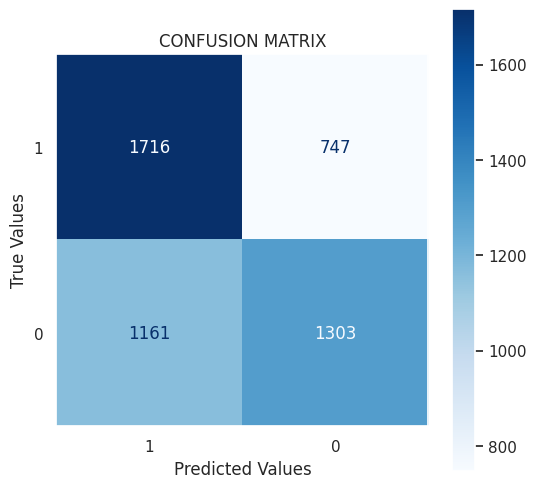

In [39]:
# Define and train the GNB model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict RUL on test set
gnb_pred = gnb.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, gnb_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, gnb_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,gnb_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 67.35370166780032 % 



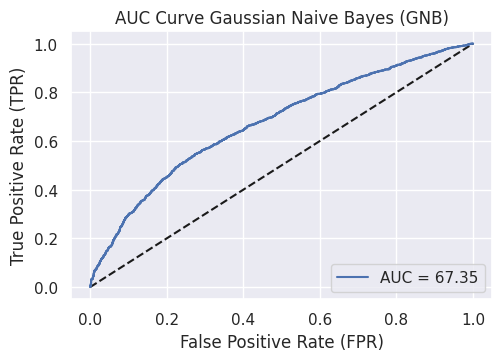

In [40]:
plt.figure(figsize=(25,16))
Y_predict1_proba = gnb.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)*100
print('ROC_AUC value :',roc_auc,"%",'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve Gaussian Naive Bayes (GNB)')
plt.grid(True)
plt.show()

Logistic Regression

ACCURACY OF THE MODEL:  63.24335295311548 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.65      0.58      0.61      2464
           1       0.62      0.68      0.65      2463

    accuracy                           0.63      4927
   macro avg       0.63      0.63      0.63      4927
weighted avg       0.63      0.63      0.63      4927



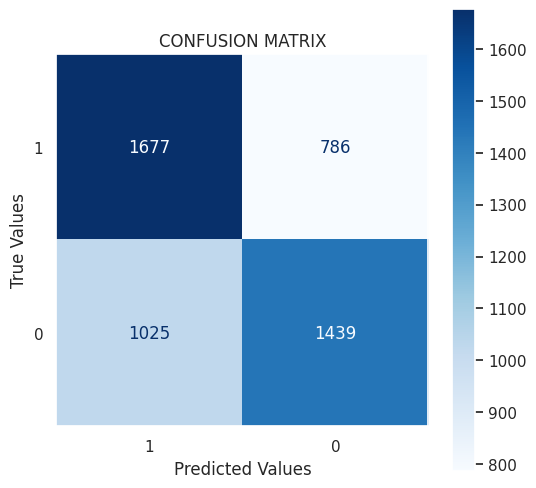

In [41]:
# Initialise Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(X_train, y_train)

# Use the trained model for prediction on the testing data
lg_pred = lg.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, lg_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, lg_pred))


sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,lg_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 68.70295635140337 



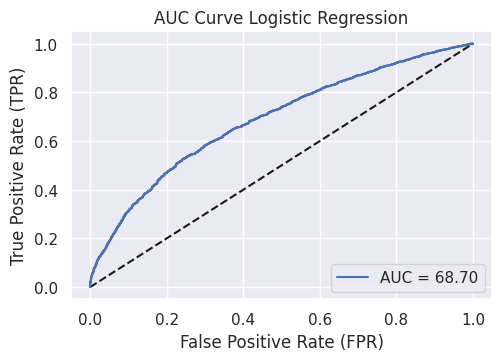

In [42]:
plt.figure(figsize=(25,16))
Y_predict1_proba = lg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)*100
print('ROC_AUC value :',roc_auc,'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve Logistic Regression')
plt.grid(True)
plt.show()

Gradient Boosting Machine

ACCURACY OF THE MODEL:  65.61802313781206 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.65      0.69      0.67      2464
           1       0.67      0.62      0.65      2463

    accuracy                           0.66      4927
   macro avg       0.66      0.66      0.66      4927
weighted avg       0.66      0.66      0.66      4927



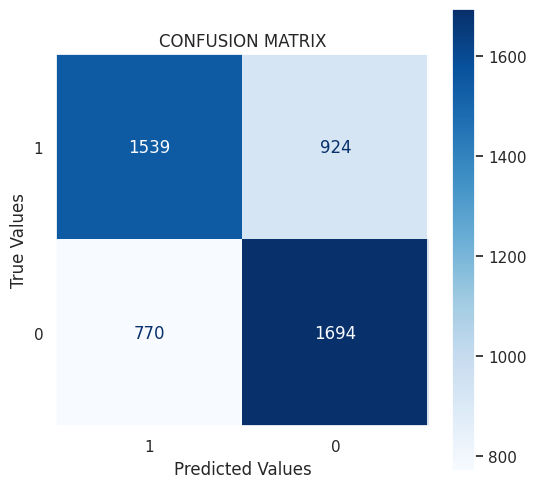

In [43]:
gradient_booster = GradientBoostingClassifier()

gradient_booster.fit(X_train,y_train)

# Predict on test set
gbc_pred = gradient_booster.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, gbc_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, gbc_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,gbc_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 71.33843876383462 %



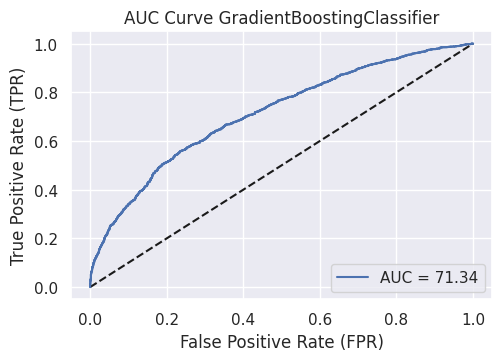

In [44]:
plt.figure(figsize=(25,16))
Y_predict1_proba = gradient_booster.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)*100
print('ROC_AUC value :',roc_auc,'%''\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve GradientBoostingClassifier')
plt.grid(True)
plt.show()

Support Vector Machine (SVM)

ACCURACY OF THE MODEL:  64.8467627359448 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      2464
           1       0.66      0.62      0.64      2463

    accuracy                           0.65      4927
   macro avg       0.65      0.65      0.65      4927
weighted avg       0.65      0.65      0.65      4927



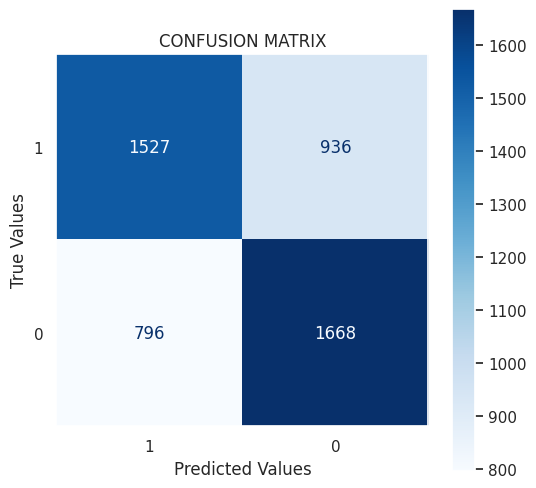

In [45]:
#Create a svm Classifier
clf = SVC(probability=True)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = clf.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, svm_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, svm_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 69.89372913931379 %



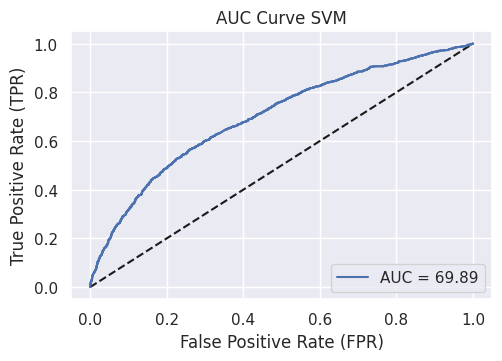

In [46]:
plt.figure(figsize=(25,16))
Y_predict1_proba = clf.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)*100
print('ROC_AUC value :',roc_auc,'%''\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve SVM')
plt.grid(True)
plt.show()

# MODEL HYPERPARAMETER TUNING

Random Forest Classifier

In [47]:
rfc = RandomForestClassifier()
params = [{'n_estimators':[100,150,200],'max_depth':range(2,6),'min_samples_leaf':range(2,5), 'min_samples_split': [8,10]}]
grd = GridSearchCV(estimator=rfc,param_grid=params)
grd_model = grd.fit(X_train,y_train)
best_model = grd_model.best_estimator_
best_model


RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

In [48]:
grd_model.best_params_

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

ACCURACY OF THE MODEL:  64.80617008321494 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.63      0.70      0.66      2464
           1       0.66      0.60      0.63      2463

    accuracy                           0.65      4927
   macro avg       0.65      0.65      0.65      4927
weighted avg       0.65      0.65      0.65      4927



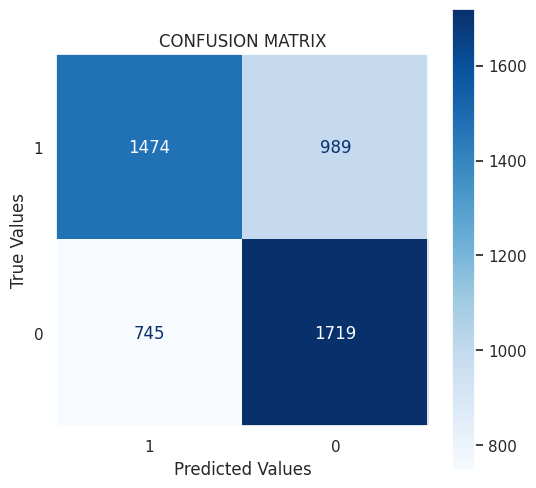

In [49]:
rfc = RandomForestClassifier(n_estimators=grd_model.best_params_['n_estimators'],
                             max_depth=grd_model.best_params_['max_depth'],
                             min_samples_leaf=grd_model.best_params_['min_samples_leaf'],
                             min_samples_split=grd_model.best_params_['min_samples_split'])

rfc.fit(X_train,y_train)

# performing predictions on the test dataset
rf_pred = rfc.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, rf_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, rf_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,rf_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

Logistic Regression

In [50]:
strat_kfold = StratifiedKFold(shuffle=True)
model = LogisticRegression()
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C': [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]}

grid_search = GridSearchCV(model, param_grid, scoring='recall', cv=strat_kfold)
grid_search = grid_search.fit(X_train, y_train)
print(f'Best recall score is: {grid_search.best_score_} for set of parameters {grid_search.best_params_}')

Best recall score is: 0.6739406675989666 for set of parameters {'C': 0.001, 'solver': 'newton-cg'}


In [51]:
grid_search.best_params_

{'C': 0.001, 'solver': 'newton-cg'}

ACCURACY OF THE MODEL:  62.898315404911706 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      2464
           1       0.62      0.68      0.65      2463

    accuracy                           0.63      4927
   macro avg       0.63      0.63      0.63      4927
weighted avg       0.63      0.63      0.63      4927



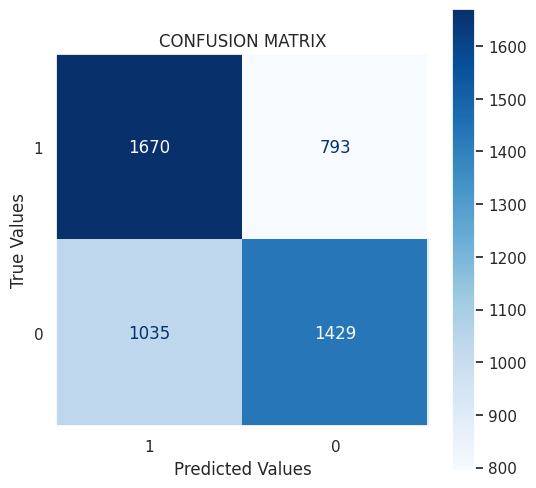

In [52]:
model = LogisticRegression(solver=grid_search.best_params_['solver'], C=grid_search.best_params_['C'], penalty='l2')

model.fit(X_train,y_train)

# performing predictions on the test dataset
y_pred = model.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, y_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

Gaussian Naive Bayes (GNB)

In [53]:
# Define the model and parameter grid
gnb = GaussianNB()
param_grid = {
    "var_smoothing": np.logspace(-9, 0, num=10),
    "priors": [None, np.array([0.7, 0.3])]
}

# Instantiate and fit GridSearchCV
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Access best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model

GaussianNB(var_smoothing=0.01)

In [54]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 0.01}

ACCURACY OF THE MODEL:  61.173127663892835 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.63      0.53      0.58      2464
           1       0.60      0.70      0.64      2463

    accuracy                           0.61      4927
   macro avg       0.62      0.61      0.61      4927
weighted avg       0.62      0.61      0.61      4927



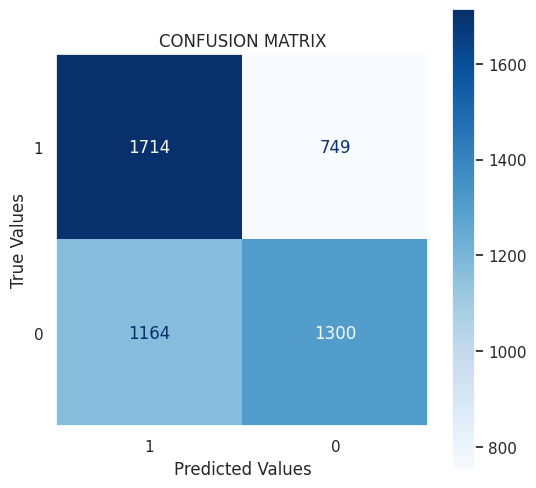

In [55]:
gnb = GaussianNB(priors = grid_search.best_params_['priors'], var_smoothing = grid_search.best_params_['var_smoothing'])

gnb.fit(X_train,y_train)

# performing predictions on the test dataset
gnb_pred = gnb.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, gnb_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, gnb_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,gnb_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

Gradient Boosting Classifier

In [56]:
# Define the model and parameter grid
model = GradientBoostingClassifier()
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.1, 0.05, 0.01],
    "max_depth": [3, 5, 7],
    "min_samples_leaf": [5, 10, 20],
    "min_samples_split": [5, 10, 15],
}

# Instantiate and fit GridSearchCV
grid_search = HalvingGridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Access best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, min_samples_leaf=20,
                           min_samples_split=5)

In [57]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 5,
 'n_estimators': 100}

ACCURACY OF THE MODEL:  65.33387456870307 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.64      0.69      0.67      2464
           1       0.67      0.61      0.64      2463

    accuracy                           0.65      4927
   macro avg       0.65      0.65      0.65      4927
weighted avg       0.65      0.65      0.65      4927



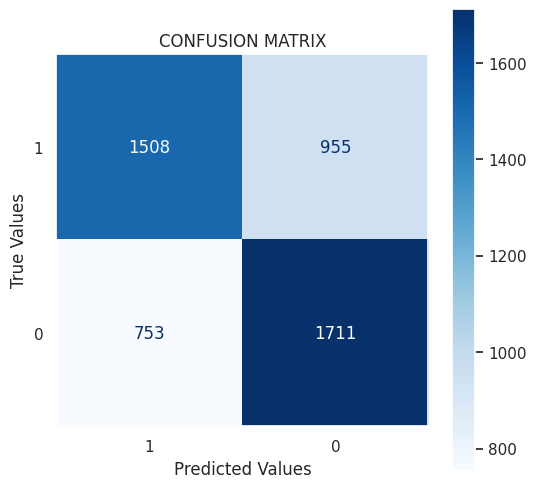

In [58]:
model = GradientBoostingClassifier(n_estimators = grid_search.best_params_['n_estimators'],
                         learning_rate = grid_search.best_params_['learning_rate'],
                         max_depth = grid_search.best_params_['max_depth'],
                         min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                         min_samples_split = grid_search.best_params_['min_samples_split'])

model.fit(X_train,y_train)

# performing predictions on the test dataset
abc_pred = model.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, abc_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, abc_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,abc_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

Support Vector Machine (SVM)

In [59]:
# Define the model and parameter grid
model = SVC()
param_grid = {
    "C": np.logspace(-3, 3, num=10),
    "kernel": ["linear", "rbf"],
    "degree": [2, 3],
    "gamma": np.logspace(-7, -3, num=5),
    "tol": [0.001, 0.01],
}

# Instantiate and fit GridSearchCV
grid_search = HalvingGridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Access best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model


SVC(C=2.154434690031882, gamma=0.001, tol=0.01)

In [60]:
grid_search.best_params_

{'C': 2.154434690031882,
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'tol': 0.01}

ACCURACY OF THE MODEL:  62.93890805764156 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.65      0.57      0.61      2464
           1       0.62      0.69      0.65      2463

    accuracy                           0.63      4927
   macro avg       0.63      0.63      0.63      4927
weighted avg       0.63      0.63      0.63      4927



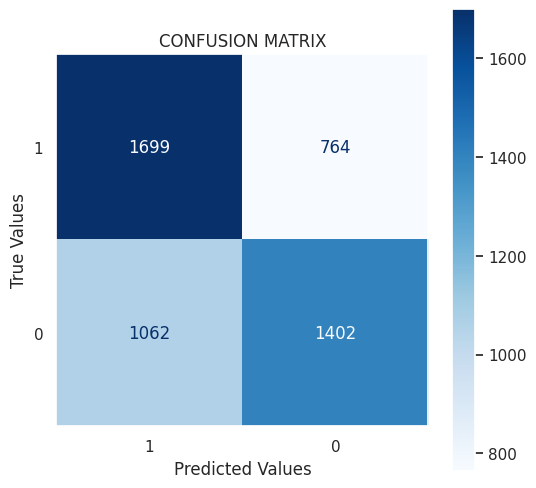

In [61]:
svm = SVC(C = grid_search.best_params_['C'],
            kernel = grid_search.best_params_['kernel'],
            degree = grid_search.best_params_['degree'],
            gamma = grid_search.best_params_['gamma'],
            tol= grid_search.best_params_['tol'])

svm.fit(X_train,y_train)

# performing predictions on the test dataset
sv_pred = svm.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, sv_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, sv_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,sv_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

# ENSEMBLING MODELS USING STACKING

Comparing the distribution of accuracy scores for each algorithm.

>lr 0.643 (0.011)
>rfc 0.751 (0.007)
>gbm 0.657 (0.011)
>svm 0.650 (0.011)
>bayes 0.624 (0.011)


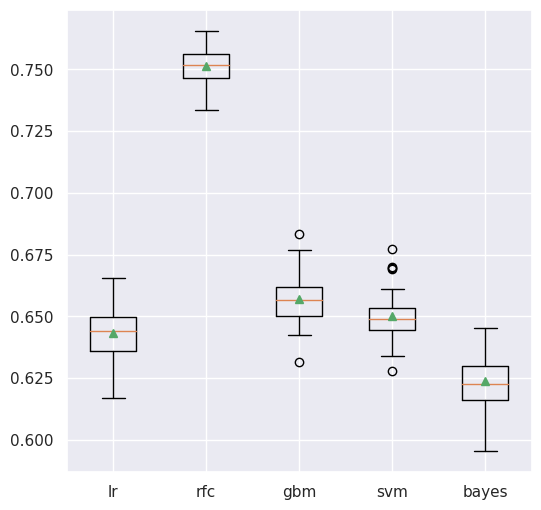

In [62]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['rfc'] = RandomForestClassifier()
  models['gbm'] = GradientBoostingClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  return models


# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We can see above that in this case, Random Forest performs the best with about 75.1 percent mean accuracy.

Now, combining these five models into a single ensemble model using stacking. We want to see if the stacking ensemble will perform better than any single base model.

>lr 0.643 (0.011)
>rfc 0.751 (0.008)
>gbm 0.657 (0.011)
>svm 0.650 (0.011)
>bayes 0.624 (0.011)
>stacking 0.768 (0.007)


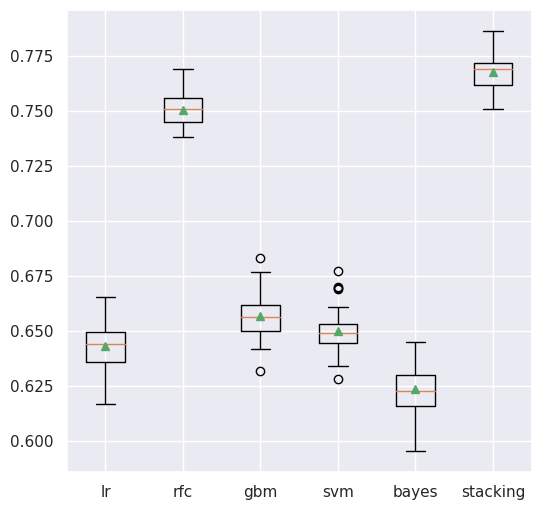

In [63]:
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('rfc', RandomForestClassifier()))
  level0.append(('gbm', GradientBoostingClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))

  # define meta learner model
  level1 = LogisticRegression()

  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model


# get a list of models to evaluate
def get_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['rfc'] = RandomForestClassifier()
  models['gbm'] = GradientBoostingClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['stacking'] = get_stacking()
  return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case above, we can see that the stacking ensemble appears to perform better than any single model on average, achieving an accuracy mean score of about 76.8 percent.

Making a prediction with a stacking ensemble

ACCURACY OF THE STACKING MODEL:  78.44530140044652 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      2464
           1       0.77      0.80      0.79      2463

    accuracy                           0.78      4927
   macro avg       0.78      0.78      0.78      4927
weighted avg       0.78      0.78      0.78      4927



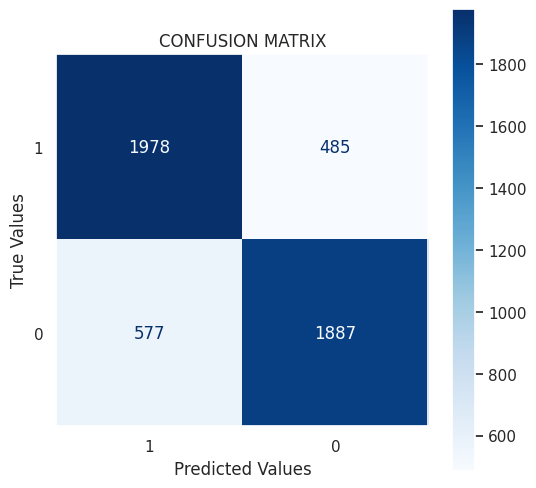

In [64]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('rfc', RandomForestClassifier()))
level0.append(('gbm', GradientBoostingClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
stacking_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
stacking_model.fit(X_train, y_train)

# performing predictions on the test test set using the stacking classifier
stacking_pred = stacking_model.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, stacking_pred)*100
print("ACCURACY OF THE STACKING MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, stacking_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,stacking_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()


In [65]:
# make a prediction for one example
Engine_Con = stacking_model.predict([[619, 5.672919, 15.738871, 2.052251, 78.396989, 87.000225]])
print('Engine Condition: %d' % (Engine_Con))

Engine Condition: 1


In [66]:
## Create a Pickle file using serialization
import pickle

with open('trained_model-1.2.2.pkl', 'wb') as f:
    pickle.dump(stacking_model,f)